# tf.data.dataset

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
# iterator

data = [1, 2, 3, 4 ,5]
my_iter = iter(data)
i = my_iter.__next__()
print(i)

1


In [49]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size =0.2, stratify=y_train)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)


In [51]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [52]:
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [53]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) # tensor_slices는 넘파이배열로 만들어줌.

In [54]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [55]:
train_ds = train_ds.shuffle(buffer_size = 50000).batch(batch_size = 32)
# pytorch의 data_loader와 같은 역할
# 이외에도 cache(), prepetch()등의 기능도 사용가능.

In [56]:
my_iter = iter(train_ds)

In [57]:
x, y = my_iter.next()

In [58]:
print(len(x), len(y))

32 32


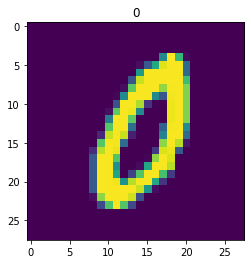

In [59]:
plt.imshow(x[0].numpy().reshape(28,28))
plt.title(y[0].numpy()) # iterate할때 tensorflow의 tensor이라는 것으로 변환 시키는데, 이를 사용하려면 numpy로 만들어줘야함.
plt.show()

In [60]:
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_ds = val_ds.batch(batch_size = 32)

In [61]:
def build_model_4():
  model = keras.Sequential([
      layers.Conv2D(32, 3, activation='relu', input_shape = (28, 28, 1)), # 32, (3, 3)이라고 적어도 됨. 32, 3하면 자동적으로 32, (3, 3)들어감.
      layers.MaxPool2D(2),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPool2D(2),
      
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy', # sparse_를 붙이면 y를 원핫인코딩을 하지 않아도 내부적으로 원핫인코딩을 하여 계산한다.
      metrics = ['acc']
       )
  
  return model

In [62]:
model = build_model_4()

In [63]:
EPOCHS = 3

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/3
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1327 - acc: 0.9599 - val_loss: 0.0582 - val_acc: 0.9823
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0431 - acc: 0.9865 - val_loss: 0.0586 - val_acc: 0.9823
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0291 - acc: 0.9903 - val_loss: 0.0478 - val_acc: 0.9861


In [64]:
model.evaluate(train_ds)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0236 - acc: 0.9926


[0.023551803082227707, 0.992562472820282]

In [65]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [66]:
y_pred = np.argmax(y_pred, axis = 1)

# 함수형 API사용해서 모델 만들기

In [67]:
def build_model_3():
    inputs = layers.input(shape = (28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.MaxPool2D(2)(x)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    x = layers.MaxPool2D(2)(x)
      
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs = inputs, outputs = outputs)

    model.compile(
      optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['acc']
    )
  
    return model

In [68]:
EPOCHS = 3

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0204 - acc: 0.9934 - val_loss: 0.0367 - val_acc: 0.9907
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0159 - acc: 0.9951 - val_loss: 0.0418 - val_acc: 0.9890
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0442 - val_acc: 0.9903


# 서브클래싱 모델

In [69]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = layers.Conv2D(32, 3, activation = 'relu')
    self.conv2 = layers.Conv2D(64, 3, activation = 'relu')
    self.maxpool = layers.MaxPool2D(2)
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(256, activation = 'relu')
    self.dense2 = layers.Dense(10, activation = 'softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.flatten(x)
    x = self.dense1(x)
    output = self.dense2(x)

    return output

In [70]:
model = MyModel()

In [71]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [72]:
x_train.shape

(48000, 28, 28, 1)

In [74]:
EPOCHS = 3
BATCH_SIZE = 32

log = model.fit(train_ds,
                epochs = EPOCHS,
                validation_data = val_ds,
                verbose = 1)

Epoch 1/3
1500/1500 [==============================] - 6s 3ms/step - loss: 0.1349 - acc: 0.9584 - val_loss: 0.0556 - val_acc: 0.9847
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0426 - acc: 0.9867 - val_loss: 0.0523 - val_acc: 0.9837
Epoch 3/3
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0287 - acc: 0.9908 - val_loss: 0.0418 - val_acc: 0.9877


In [75]:
model.evaluate(train_ds)

1500/1500 [==============================] - 3s 2ms/step - loss: 0.0165 - acc: 0.9949


[0.016454026103019714, 0.9948958158493042]